<h1>Capital Bikeshare Analytic Report and Research Proposal</h1>

<p>The purpose of this project is to analyze the affect of weather on Capitol Bikeshare ridership.</p>
<p>Data Source: https://www.kaggle.com/marklvl/bike-sharing-dataset</p>

<p>This dataset contains data from the <a href='https://www.capitalbikeshare.com/' target='blank'>Capital Bikeshare</a> in Washington DC and corresponding weather data for 2011 and 2012.
    
The Capital Bikeshare has two different membership types: Annual and Daily.  These are represented in the data as casual and registered, with casual corresponding to daily memberships and registered to the annual memberships.

Each row in the dataset represents one day.  Columns include the day of week, month, season, weather situation, temperature, humidity, windspeed, the number of casual rides, registered rides, and the total number of rides.

<ol>
<h3>What can we determine from the data?</h3>
    <p>From an examination of the data, it was decided that several questions could be addressed:</p>
                <li>Does season affect bikeshare usage?</li>
                <li>Do ridership trends vary based on type of membership?</li>
                <li>Does weather affect bikeshare usage?</li>
                <li>What would be a valuable direction for further investigation?</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline


In [2]:
#plt.rcParams['figure.figsize'] = [20.0, 7.0]
#plt.rcParams.update({'font.size': 22})

sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
df = pd.read_csv('day.csv')

In [4]:
#view column names
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#view summary stats of numeric variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [8]:
#rename columns
df = df.rename(columns={'dteday':'datetime',
                        'yr':'year',
                        'mnth':'month',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'total_rides'})

#set categorical variables
##why set as categories??
df['season'] = df['season'].astype('category')
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [9]:
df.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rides
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<h3>Does season affect bikeshare usage?</h3>
<h2><font color='green'>Yes.</font></h2>
<p>As we can see below season has an impact on bikeshare usage.  There are the least number of rides in winter and the greatest in summer.  The <strong>large T-Value of -20.41</strong> and the <strong>small P-Value of 2.12e-62</strong> tell us there is a significant difference between summer and winter ridership.  The differences in ridership between Spring and Fall however are not significant with a <strong>small T-value of 1.48</strong> and a <strong>large P-Value of 0.14.</strong></p>


In [10]:
print('Winter vs Spring')
print(ttest_ind(df.total_rides[df['season'] == 1], df.total_rides[df['season'] == 2]))
print('Winter vs Summer')
print(ttest_ind(df.total_rides[df['season'] == 1], df.total_rides[df['season'] == 3]))
print('Winter vs Fall')
print(ttest_ind(df.total_rides[df['season'] == 1], df.total_rides[df['season'] == 4]))
print('Spring vs Fall')
print(ttest_ind(df.total_rides[df['season'] == 2], df.total_rides[df['season'] == 4]))
print('Spring vs Summer')
print(ttest_ind(df.total_rides[df['season'] == 2], df.total_rides[df['season'] == 3]))
print('Summer vs Fall')
print(ttest_ind(df.total_rides[df['season'] == 3], df.total_rides[df['season'] == 4]))

Winter vs Spring
Ttest_indResult(statistic=-14.65873026929708, pvalue=1.5284822271363832e-38)
Winter vs Summer
Ttest_indResult(statistic=-20.40505135948835, pvalue=2.134072968524431e-62)
Winter vs Fall
Ttest_indResult(statistic=-12.933694332032188, pvalue=1.2022067175230552e-31)
Spring vs Fall
Ttest_indResult(statistic=1.480020595990678, pvalue=0.13974231789501412)
Spring vs Summer
Ttest_indResult(statistic=-3.9765418611661243, pvalue=8.411509811510022e-05)
Summer vs Fall
Ttest_indResult(statistic=5.541003097872063, pvalue=5.7789091515026665e-08)


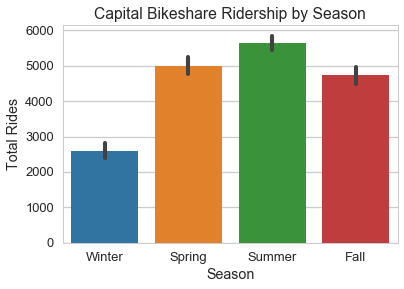

In [11]:
fig, ax = plt.subplots()
sns.barplot(data=df[['season','total_rides']],
            x='season',
            y='total_rides',
            ax=ax)

plt.title('Capital Bikeshare Ridership by Season')
plt.ylabel('Total Rides')
plt.xlabel('Season')

tick_val=[0, 1, 2, 3]
tick_lab=['Winter', 'Spring', 'Summer', 'Fall']
plt.xticks(tick_val, tick_lab)

plt.show()

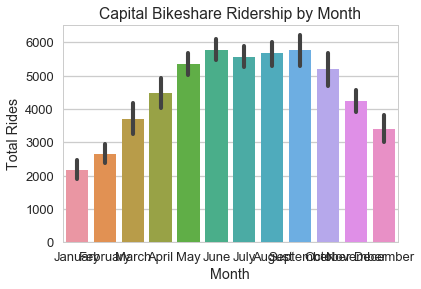

In [12]:
fig, ax = plt.subplots()
sns.barplot(data=df[['month','total_rides']], x='month', y='total_rides', ax=ax)

plt.title('Capital Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)

plt.show()

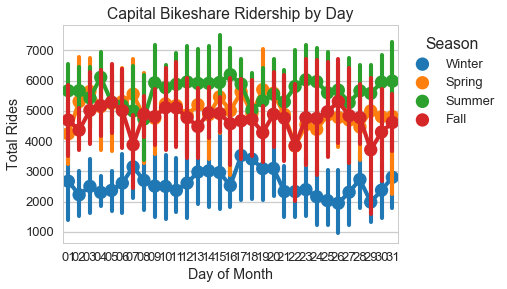

In [13]:
df['day_of_month'] = df.datetime.str[-2:]
df.head()

fig, ax = plt.subplots()
sns.pointplot(data=df[['day_of_month', 'total_rides', 'season']],
              x='day_of_month',
              y='total_rides',
              hue='season',
              ax=ax)

plt.title('Capital Bikeshare Ridership by Day')
plt.ylabel('Total Rides')
plt.xlabel('Day of Month')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Winter', 'Spring', 'Summer', 'Fall'], title='Season', bbox_to_anchor=(1, 1), loc=2)

plt.show()

<h2>Do ridership trends vary based on type of membership?</h2>
<h3><font color='green'>Yes.</font></h3>

<p>As we can see below registered riders take more trips than casual riders.  The <strong>large T-Value of 44.54</strong> tells us there is a significant difference between the two groups.  The <strong>very small P-Value of 2.54e-274</strong> tells us this is unlikely to have occurred by chance.</p>

In [14]:
ttest_ind(df['registered'], df['casual'])

Ttest_indResult(statistic=44.53675092663381, pvalue=2.539407750032885e-274)

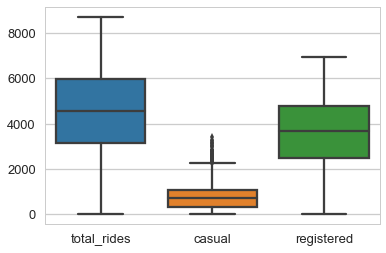

In [15]:
fig = plt.subplot()
sns.boxplot(data=df[['total_rides', 'casual', 'registered']])

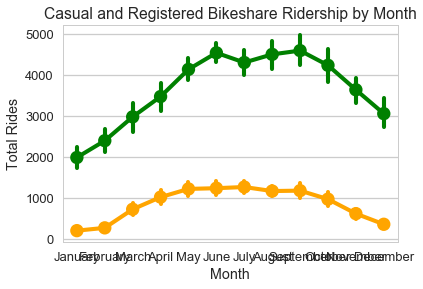

In [16]:
fig, ax = plt.subplots()
sns.pointplot(data=df[['month', 'casual', 'registered']],
              x='month',
              y='casual',
              ax=ax,
              color='orange')

sns.pointplot(data=df[['month', 'casual', 'registered']],
              x='month',
              y='registered',
              ax=ax,
              color='green')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

plt.show()

<h2>Does weather affect bikeshare usage?</h2>
<h3><font color='green'>Yes.</font></h3>

<p>As we can see below, types of weather has a large impact on ridership.  There are significantly less rides during snow and thunderstorms than during periods of nicer weather.  We can also see that this trend holds up across all seasons.</p>

<h5>Types of Weather</h5>
<ol>
    <li>Clear, Few clouds, Partly cloudy, Partly cloudy</li>
<li>Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
<li>Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
</ol>

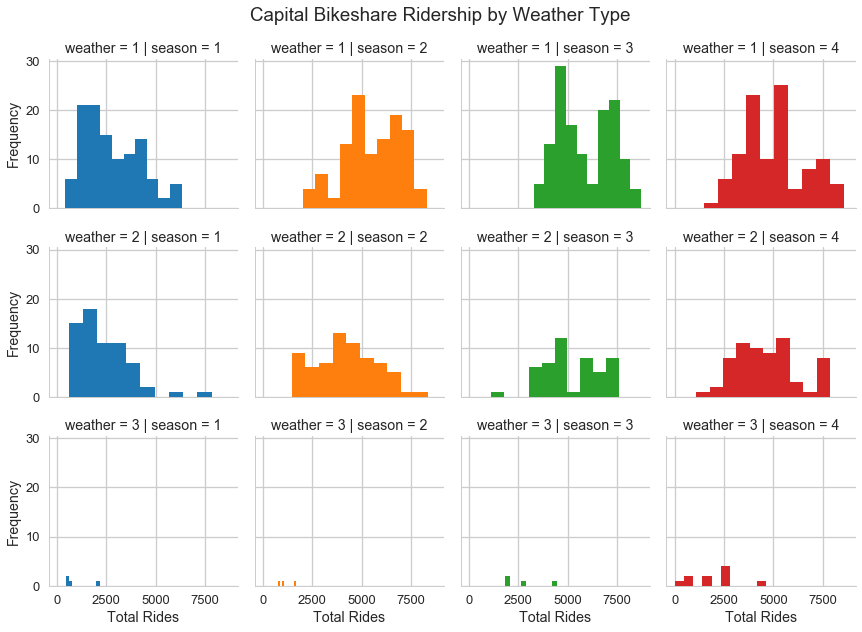

In [17]:
g = sns.FacetGrid(data=df,
               col='season',
               row='weather',hue='season')
g.map(plt.hist,'total_rides')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Capital Bikeshare Ridership by Weather Type')

g.set_xlabels('Total Rides')
g.set_ylabels('Frequency')

plt.show()

<h3>What would be a valuable direction for further investigation?</h3>

<ul><p>There are several questions that would be interesting to research further.  These include:</p>
    <li>Do these trend hold up in new data?  This data comes from 2011 and 2012.  It would be interesting to see if the patterns hold up in more recent years.</li>
    <li>Do major events affect usage? For example major events like the presidential inauguration or women's march.  And also smaller and more frequent events such as baseball or hockey games.</li>
    <li>How is duration of trips affected by the weather?</li>
    <li>What are the most popular stations?  Does weather have an effect on this?</li>
    <li>It would be interesting to compare to Uber or Lift.  For example comparing how weather affects each method of transportation.</li>
</ul>